In [1]:
import xarray as xr
from floater import rclv
from matplotlib import pyplot as plt
%matplotlib inline

/Users/rpa/anaconda/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
ds = xr.open_dataset('lavd_prob_reg.nc')
ds

<xarray.Dataset>
Dimensions:    (x0: 450, y0: 500)
Coordinates:
  * y0         (y0) float32 -40.99 -40.97 -40.95 -40.93 -40.91 -40.89 -40.87 ...
  * x0         (x0) float32 1.01 1.03 1.05 1.07 1.09 1.11 1.13 1.15 1.17 ...
Data variables:
    lavd_15_h  (y0, x0) float32 ...
    lavd_15_d  (y0, x0) float32 ...
    lavd_15_w  (y0, x0) float32 ...
    lavd_30_h  (y0, x0) float32 ...
    lavd_30_d  (y0, x0) float32 ...
    lavd_30_w  (y0, x0) float32 ...
    lavd_60_h  (y0, x0) float32 ...
    lavd_60_d  (y0, x0) float32 ...
    lavd_60_w  (y0, x0) float32 ...

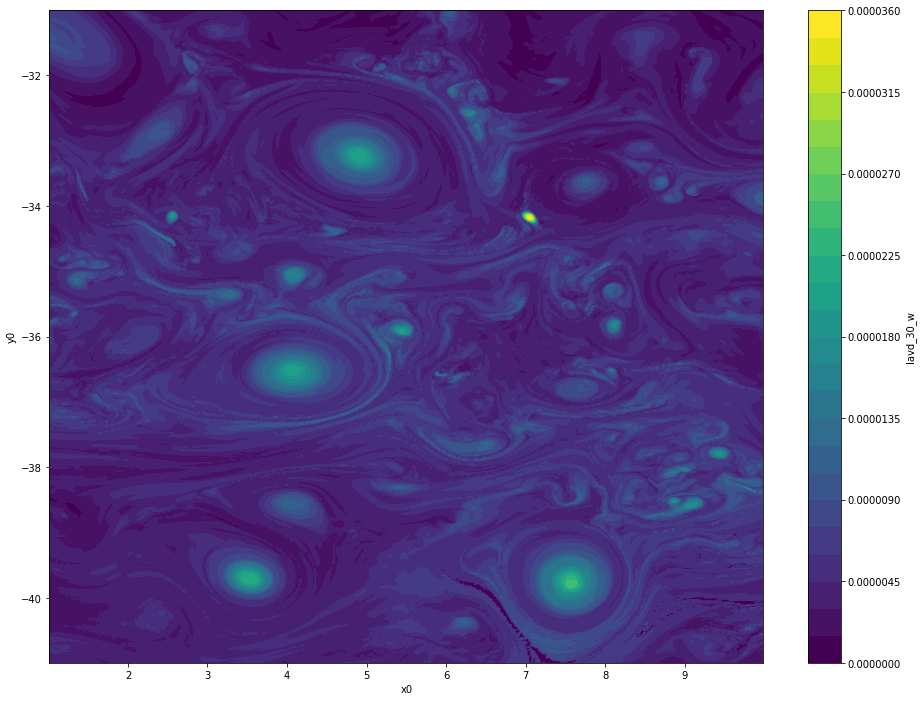

In [6]:
data = ds.lavd_30_w
plt.figure(figsize=(16,12))
data.plot.contourf(levels=30)

In [7]:
from skimage.feature import peak_local_max

In [40]:
raw = data.data
plm = peak_local_max(raw, min_distance=50)

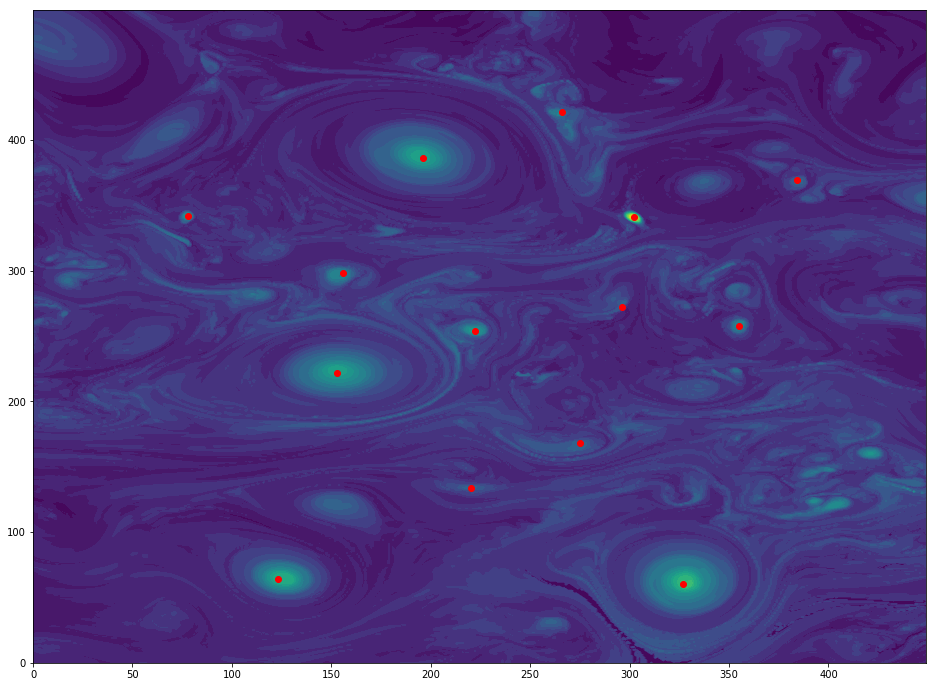

In [41]:
plt.figure(figsize=(16,12))
plt.contourf(raw, 30)
plt.plot(plm[:, 1], plm[:, 0], 'ro')

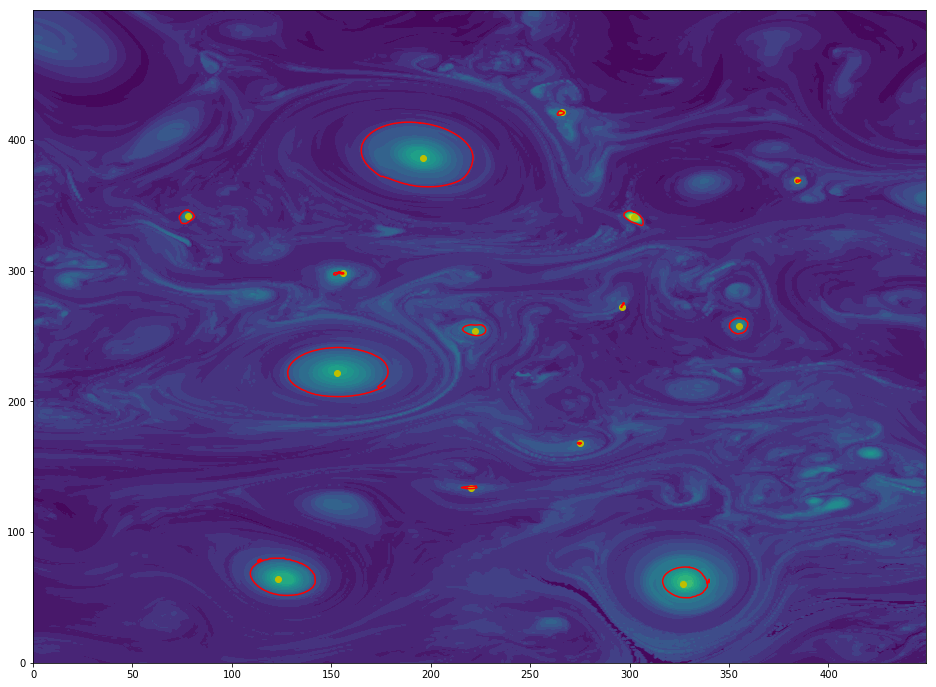

In [50]:
plt.figure(figsize=(16,12))
plt.contourf(raw, 30)
plt.plot(plm[:, 1], plm[:, 0], 'yo')
for ji in plm:
    con, area = rclv.convex_contour_around_maximum(raw, ji, init_contour_step_frac=0.1, convex_def=0.01)
    plt.plot(con[:, 1], con[:, 0], 'r-')